<a href="https://colab.research.google.com/github/RamiroCabri1/AluraStoreLatam/blob/main/Copia_de_alurastorelatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  Tarjeta de crédito                   4   6.25184 -75.56359  
2  Tarjeta de crédito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. Análisis de facturación



## 1.1 - Primer contacto.
### La idea es tomar contacto con los datos y poder ( sin sacar aun concluciones ) en un primer instante su informacion.

La funcion info nos da un pequeño vistazo a los datos a tratar

In [2]:
print(tienda.info())
print(tienda2.info())
print(tienda3.info())
print(tienda4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data col

La funcion describe nos da datos estadisticos interesantes para poder ver


In [3]:
print(tienda.describe())
print(tienda2.describe())
print(tienda3.describe())
print(tienda4.describe())

             Precio  Costo de envío  Calificación  Cantidad de cuotas  \
count  2.359000e+03     2359.000000   2359.000000         2359.000000   
mean   4.878679e+05    26018.609580      3.976685            2.943196   
std    6.146868e+05    32860.001783      1.415370            2.819897   
min    7.600000e+03        0.000000      1.000000            1.000000   
25%    5.575000e+04     3100.000000      3.000000            1.000000   
50%    2.353000e+05    12400.000000      5.000000            1.000000   
75%    6.781000e+05    36000.000000      5.000000            4.000000   
max    2.977000e+06   160800.000000      5.000000           24.000000   

               lat          lon  
count  2359.000000  2359.000000  
mean      5.365283   -74.789417  
std       2.287445     1.217827  
min      -4.215280   -77.281110  
25%       4.609710   -75.563590  
50%       4.609710   -74.199040  
75%       6.251840   -74.081750  
max      11.544440   -67.923900  
             Precio  Costo de envío 

## 1.2 Busqueda de datos nulos o incompletos.


In [4]:
print("Nulos en Tienda 1:")
print(tienda.isnull().sum())

Nulos en Tienda 1:
Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
dtype: int64


In [5]:
print("Nulos en Tienda 3:")
print(tienda3.isnull().sum())

Nulos en Tienda 3:
Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
dtype: int64


In [6]:
print("Nulos en Tienda 4:")
print(tienda4.isnull().sum())

Nulos en Tienda 4:
Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
dtype: int64


In [7]:
print("Nulos en Tienda 2:")
print(tienda2.isnull().sum())

Nulos en Tienda 2:
Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
dtype: int64


### Podemos ver que no existen datos nulos en los datasets.

## 1.3 Analisis


In [8]:
count = 1
for t in [tienda, tienda2, tienda3, tienda4]:
    print(f"El beneficio bruto ( sin costos de envio  ) de la tienda {count}  es {t['Precio'].sum()} ")
    count += 1

El beneficio bruto ( sin costos de envio  ) de la tienda 1  es 1150880400.0 
El beneficio bruto ( sin costos de envio  ) de la tienda 2  es 1116343500.0 
El beneficio bruto ( sin costos de envio  ) de la tienda 3  es 1098019600.0 
El beneficio bruto ( sin costos de envio  ) de la tienda 4  es 1038375700.0 


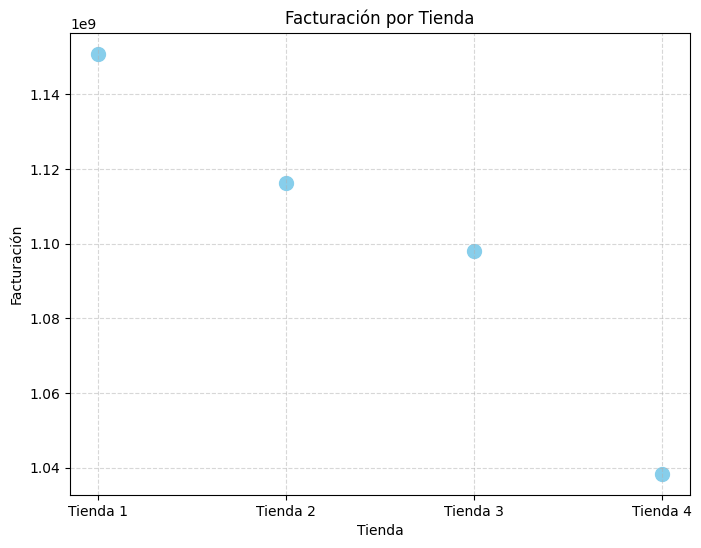

In [9]:


# Forma simple de obtener beneficios de cada tienda, sin restar costos de envio.
beneficios_tienda1 = tienda['Precio'].sum()
beneficios_tienda2 = tienda2['Precio'].sum()
beneficios_tienda3 = tienda3['Precio'].sum()
beneficios_tienda4 = tienda4['Precio'].sum()



# Datos de facturación de cada tienda
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturacion = [beneficios_tienda1, beneficios_tienda2, beneficios_tienda3, beneficios_tienda4]

#  Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(tiendas, facturacion, color='skyblue', marker='o', s=100)
plt.title('Facturación por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


El grafico hace mas "visual" esta diferencia. En efecto la tienda que mas tiene ventas es la Tienda N1. Si bien como se puede ver, el marguen es muy pequeño. Seria interesante ver el porque esta tienda vende mas. Para ellos podemos seguir indagando y comparando variables.

In [10]:
# Podemos comenzar viendo que cantidad de cuotas o que podructos vende mas esta tienda a comparacion de las otras. Quizas los costos de envio tengan q ver.
lista = []
for i in tienda['Producto']:
    if i not in lista:
        lista.append(i)
print(lista)

# Esta lista muestra todos los productos que vende la tiende. Podemos proceder a ver que producto se vendio mas y cuales son los precios.

['Asistente virtual', 'Mesa de comedor', 'Juego de mesa', 'Microondas', 'Silla de oficina', 'Bloques de construcción', 'Muñeca bebé', 'Lavavajillas', 'Lavadora de ropa', 'Carrito de control remoto', 'Refrigerador', 'Auriculares', 'Olla de presión', 'Bicicleta', 'Ciencia de datos con Python', 'Balón de voleibol', 'Ajedrez de madera', 'TV LED UHD 4K', 'Vaso térmico', 'Kit de bancas', 'Dashboards con Power BI', 'Cubertería', 'Set de ollas', 'Batería', 'Cuerda para saltar', 'Estufa', 'Cama box', 'Impresora', 'Mesa de noche', 'Armario', 'Dinosaurio Rex', 'Guitarra eléctrica', 'Secadora de ropa', 'Sofá reclinable', 'Tablet ABXY', 'Cubo mágico 8x8', 'Set de vasos', 'Modelado predictivo', 'Iphone 15', 'Mochila', 'Balón de baloncesto', 'Auriculares con micrófono', 'Sillón', 'Guitarra acústica', 'Iniciando en programación', 'Celular ABXY', 'Smartwatch', 'Mesa de centro', 'Cama king', 'Smart TV', 'Pandereta']


In [11]:
dicTienda = {}
for i in lista:
    dicTienda[i] = len(tienda[tienda['Producto'] == i])

print(dicTienda)

{'Asistente virtual': 40, 'Mesa de comedor': 40, 'Juego de mesa': 43, 'Microondas': 60, 'Silla de oficina': 46, 'Bloques de construcción': 56, 'Muñeca bebé': 40, 'Lavavajillas': 48, 'Lavadora de ropa': 47, 'Carrito de control remoto': 52, 'Refrigerador': 54, 'Auriculares': 50, 'Olla de presión': 35, 'Bicicleta': 54, 'Ciencia de datos con Python': 39, 'Balón de voleibol': 42, 'Ajedrez de madera': 49, 'TV LED UHD 4K': 60, 'Vaso térmico': 54, 'Kit de bancas': 44, 'Dashboards con Power BI': 42, 'Cubertería': 52, 'Set de ollas': 43, 'Batería': 53, 'Cuerda para saltar': 40, 'Estufa': 45, 'Cama box': 44, 'Impresora': 54, 'Mesa de noche': 56, 'Armario': 60, 'Dinosaurio Rex': 40, 'Guitarra eléctrica': 47, 'Secadora de ropa': 58, 'Sofá reclinable': 46, 'Tablet ABXY': 42, 'Cubo mágico 8x8': 44, 'Set de vasos': 41, 'Modelado predictivo': 51, 'Iphone 15': 49, 'Mochila': 39, 'Balón de baloncesto': 55, 'Auriculares con micrófono': 33, 'Sillón': 41, 'Guitarra acústica': 46, 'Iniciando en programación'

# 2. Ventas por categoría

In [12]:
# Lo primero que tenemos es venta por categorias.

lista_productos = []

for i in tienda['Categoría del Producto']:
    if i not in lista_productos:
        lista_productos.append(i)
print(lista_productos)

['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Artículos para el hogar', 'Deportes y diversión', 'Libros', 'Instrumentos musicales']


Estas son las categorias que encontramos en cada tienda. Podemos proceder a ver que categoria son las mas vendidas en cada sucursal.

In [13]:
# Creo esta funcion para poder luego reutilizarla.

def grafico_categorias(tienda, numero):
  # Creo este diccionario para luego poder graficar.
  diccionario_categorias_tiendas ={}
  for i in tienda['Categoría del Producto']:
      if i not in diccionario_categorias_tiendas:
          diccionario_categorias_tiendas[i] = len(tienda[tienda['Categoría del Producto'] == i])


  # Creacion del grafico.
  cantidad_ventas = diccionario_categorias_tiendas.values()
  categorias = diccionario_categorias_tiendas.keys()

  plt.figure(figsize=(12, 8))
  plt.bar(categorias, cantidad_ventas, color='red')
  plt.title(f"Cantidad de Ventas por Categoría Tienda {numero}")
  plt.xlabel("Categoría del Producto")
  plt.ylabel("Cantidad de Ventas")
  plt.xticks(rotation=45, ha='right')
  for i, v in enumerate(cantidad_ventas):
      plt.text(i, v + 0.5, str(v), color='black', ha='center', fontweight='bold')

  plt.show()


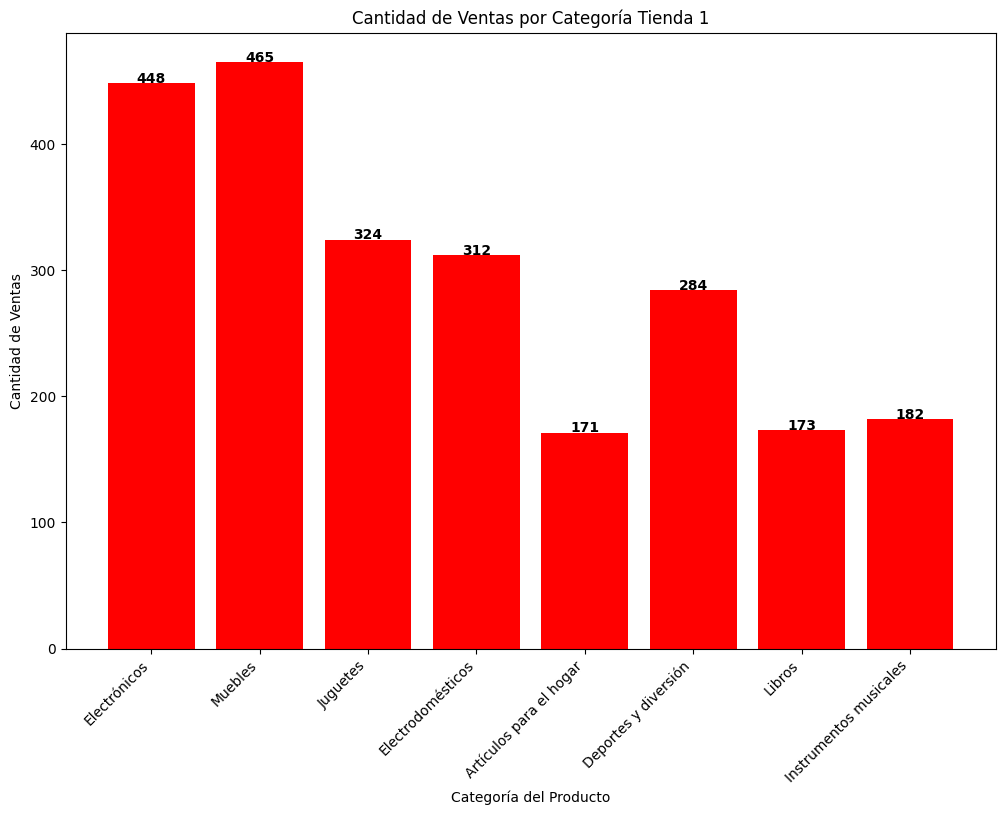

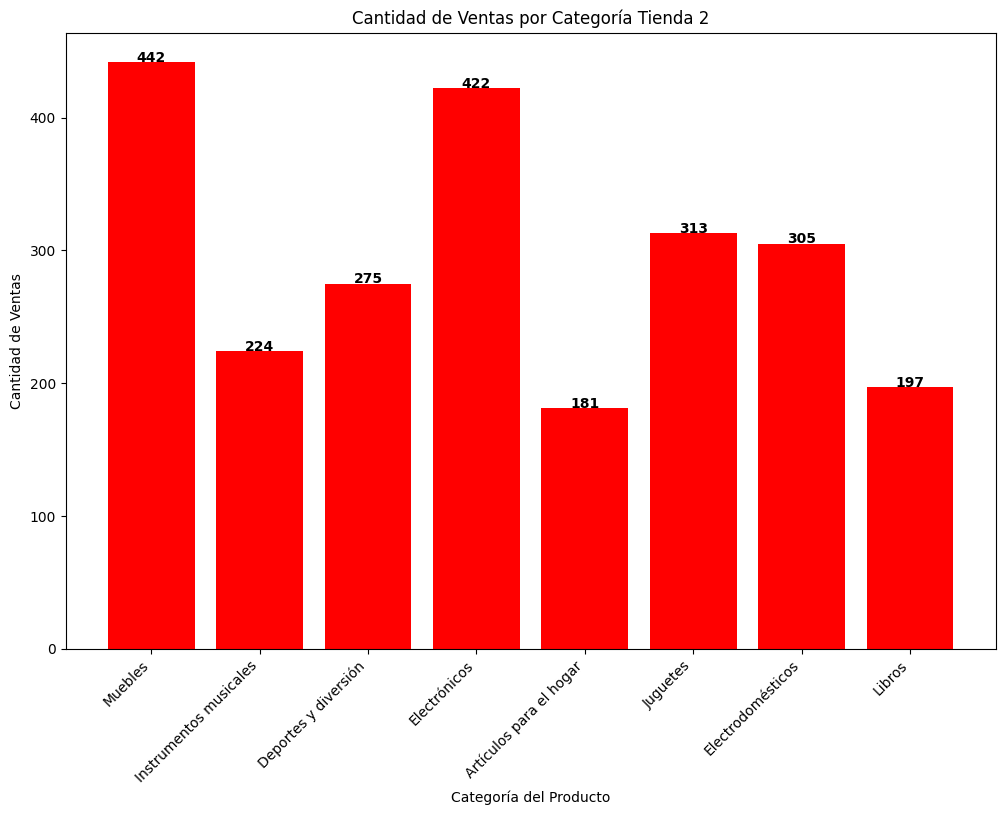

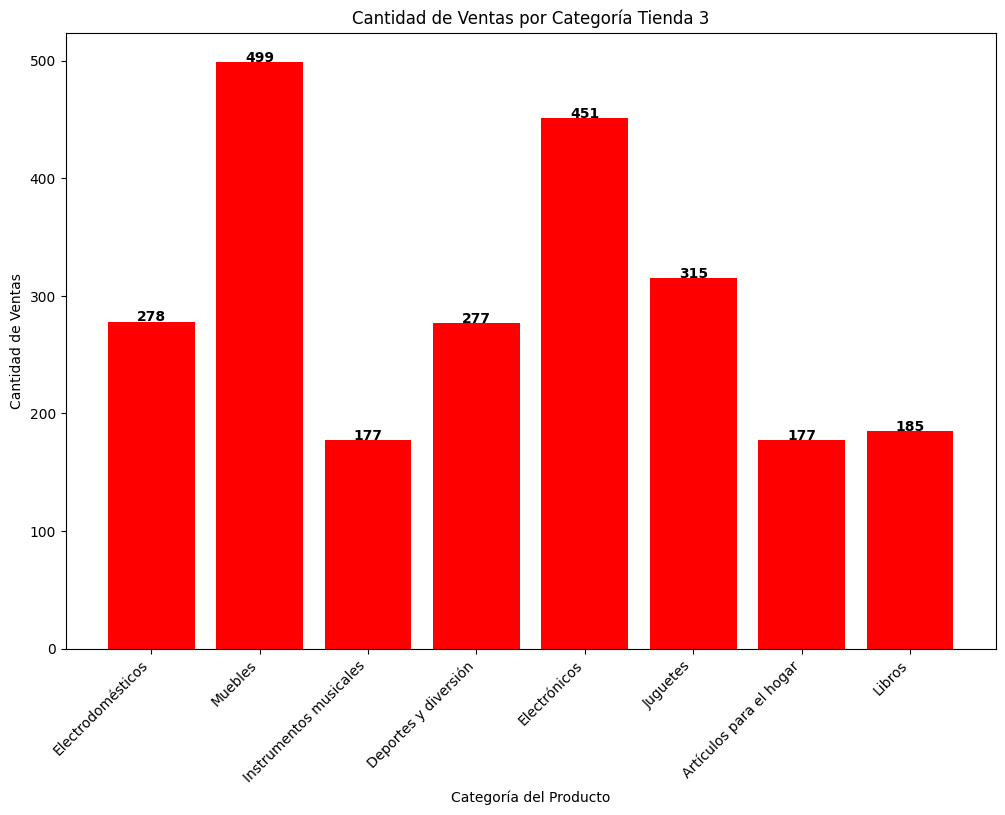

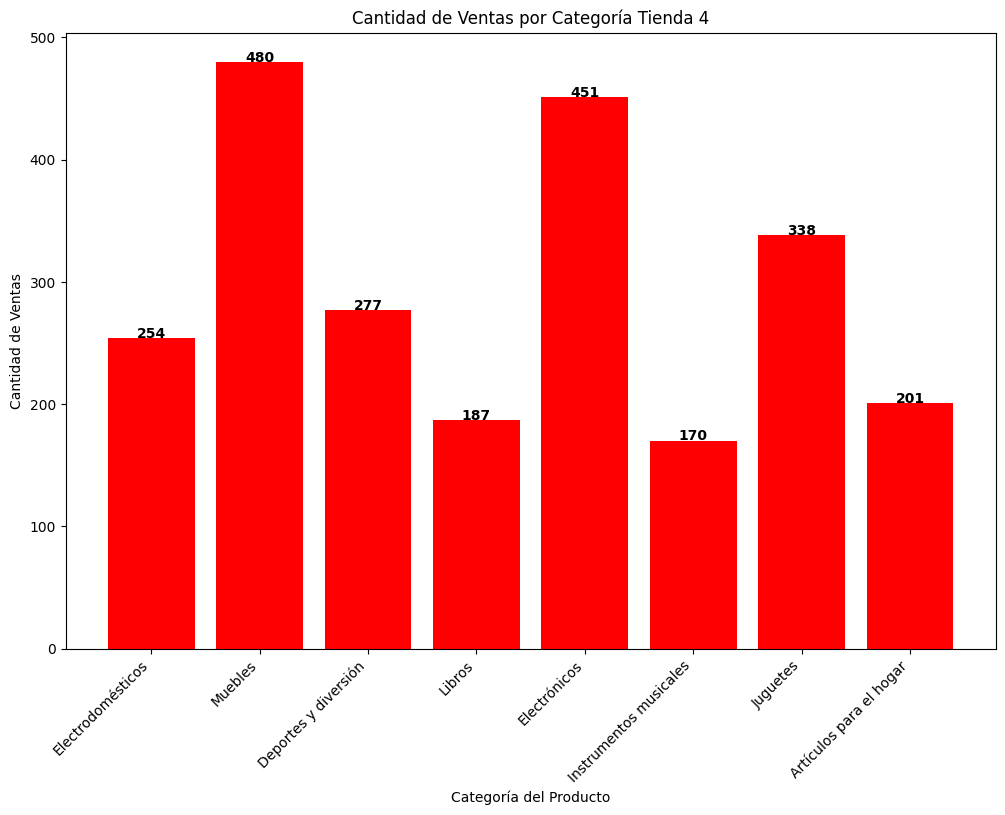

In [14]:
grafico_categorias(tienda, 1)
grafico_categorias(tienda2, 2)
grafico_categorias(tienda3, 3)
grafico_categorias(tienda4, 4)

Estos graficos muestran cantidades totales por tienda.

In [15]:
# Creamos un Df con la totalidad de los datos. Para luego poder ver que categorias fue la mas vendida en su global.


df_total = pd.concat([tienda, tienda2, tienda3, tienda4])


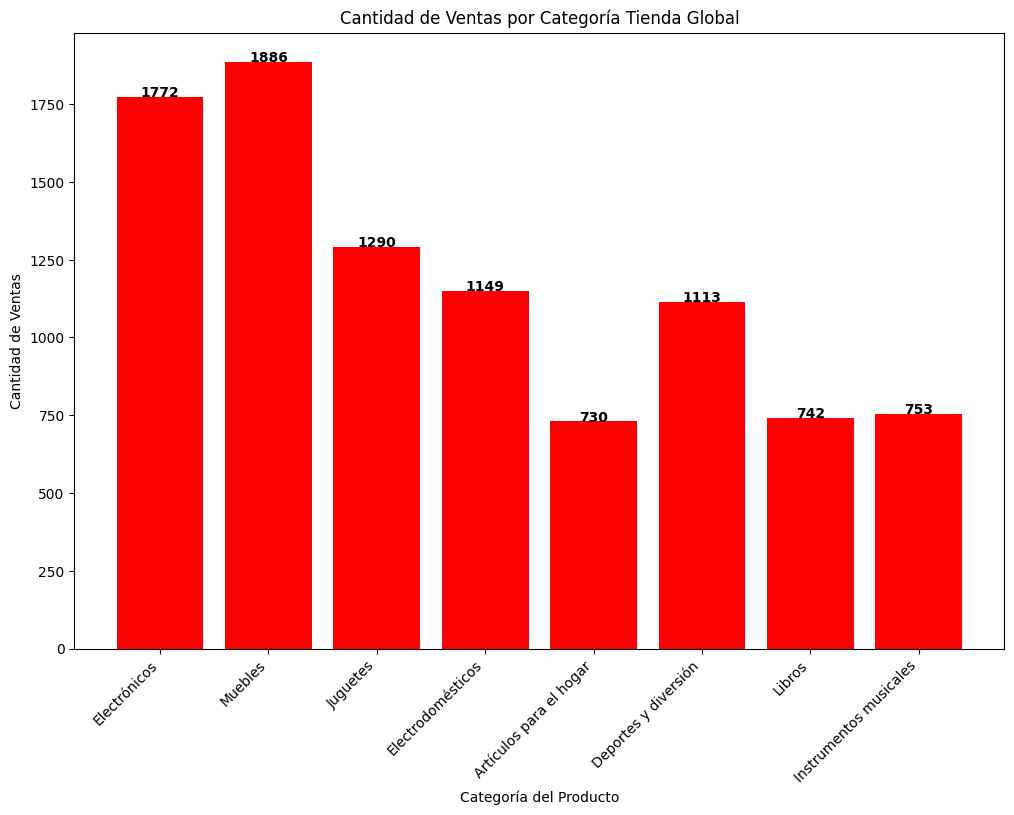

In [16]:
grafico_categorias(df_total, "Global")

Como se puede ver en los graficos anteriores, las categorias mas vendidas se modifican segun la tienda. Si embargo en el ultimo grafico podemos ver las ventas totales por categorias en el global de la empresa, destacandose muebles y electronica.

In [17]:
monto_total = df_total.groupby("Categoría del Producto")['Precio'].sum()/1000000
print(monto_total)

Categoría del Producto
Artículos para el hogar      57.5798
Deportes y diversión        142.9777
Electrodomésticos          1324.7511
Electrónicos               1660.5765
Instrumentos musicales      348.7726
Juguetes                     73.6044
Libros                       37.6961
Muebles                     757.6610
Name: Precio, dtype: float64


Este simple acercamiento, nos permite tener una idea de cuales fueron las categorias

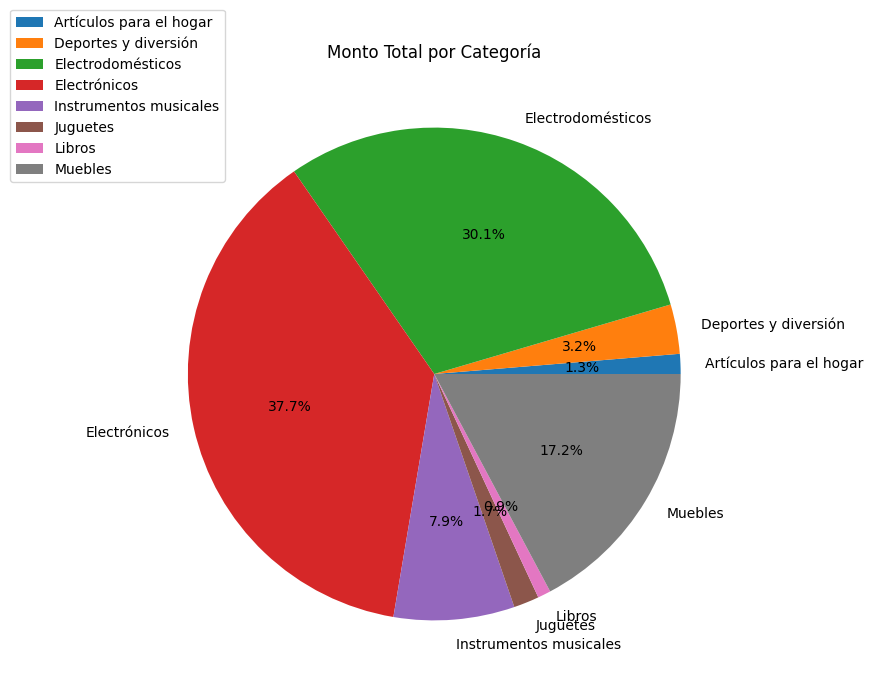

In [18]:


monto_total.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Monto Total por Categoría')
plt.ylabel('')
plt.legend(loc='lower left', bbox_to_anchor=(-0.2, 0.8))
plt.show()


El grarfico de tortas muestra claramente la importancia que tienen los aparatos electronicos de cualquier tipo sobre el volumen total de lo vendido.

# 3. Calificación promedio de la tienda


In [19]:
avg_rating_tienda1 = tienda['Calificación'].mean()
avg_rating_tienda2 = tienda2['Calificación'].mean()
avg_rating_tienda3 = tienda3['Calificación'].mean()
avg_rating_tienda4 = tienda4['Calificación'].mean()
avr_global_rating = avg_rating_tienda1 + avg_rating_tienda1+ avg_rating_tienda3+ avg_rating_tienda4

print(avg_rating_tienda1)
print(avg_rating_tienda2)
print(avg_rating_tienda3)
print(avg_rating_tienda4)
print(avr_global_rating/4)

3.976685036032217
4.037303942348453
4.048325561678677
3.9957591178965224
3.9993636879099084


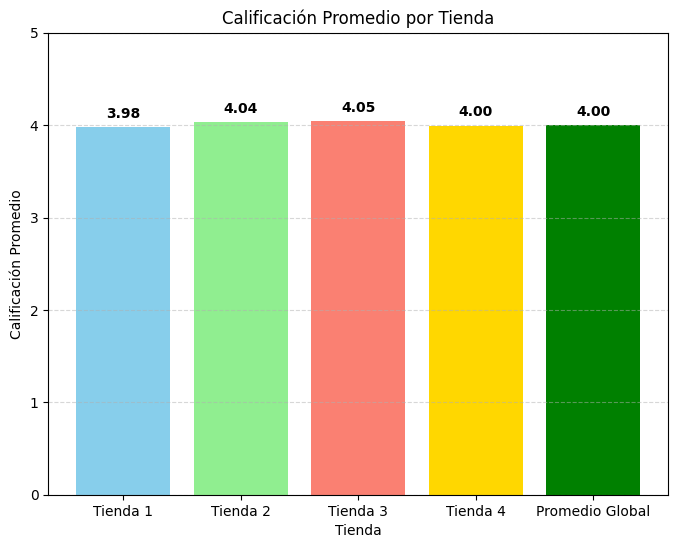

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


In [20]:

tiendas_rating = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4","Promedio Global"]
avg_ratings = [avg_rating_tienda1, avg_rating_tienda2, avg_rating_tienda3, avg_rating_tienda4,avr_global_rating/4]


plt.figure(figsize=(8, 6))
plt.bar(tiendas_rating, avg_ratings, color=['skyblue', 'lightgreen', 'salmon', 'gold',"green"])
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add the average rating value on top of each bar
for i, v in enumerate(avg_ratings):
    plt.text(i, v + 0.1, f"{v:.2f}", color='black', ha='center', fontweight='bold')

plt.show()

print(f"Calificación promedio Tienda 1: {avg_rating_tienda1:.2f}")
print(f"Calificación promedio Tienda 2: {avg_rating_tienda2:.2f}")
print(f"Calificación promedio Tienda 3: {avg_rating_tienda3:.2f}")
print(f"Calificación promedio Tienda 4: {avg_rating_tienda4:.2f}")

Las diferencias en el promedio de calificacion son realmente minusculas.

# 4. Productos más y menos vendidos

## 4.1 Productos mas vendidos.

Primero seria interesante ver cuales son los productos mas vendidos en cada tienda. Para luego hacerlo global.

In [21]:
# Procedo a crear una funcion para luego pasar como argumentos las tiendas y el numero de las mismas.

def producto_mas_vendido(shop: pd.DataFrame, tienda_number: str):
  """
  Calcula y muestra el producto más vendido en una tienda determinada y grafica
  la cantidad vendida de cada producto.

  Args:
    shop: Un DataFrame de pandas que contiene los datos de la tienda.
          Debe tener una columna llamada 'Producto' que contenga los nombres
          de los productos vendidos.
    tienda_number: Una cadena de texto que representa el número o nombre de
                   la tienda (por ejemplo, "Tienda 1", "Global"). Se utiliza
                   para los títulos de impresión y gráficos.
  """
  dicTienda = {}
  # Contar la frecuencia de cada producto
  for i in shop['Producto'].unique():
    dicTienda[i] = len(shop[shop['Producto'] == i])

  # Encontrar el producto con la máxima frecuencia
  producto_mas_vendido_nombre = max(dicTienda, key=dicTienda.get)
  producto_mas_vendido_cantidad = dicTienda[producto_mas_vendido_nombre]

  print(f"El producto más vendido en {tienda_number} es '{producto_mas_vendido_nombre}' con {producto_mas_vendido_cantidad} unidades vendidas.")

  # Preparar datos para el gráfico
  products = dicTienda.keys()
  quantities = dicTienda.values()

  # Crear el gráfico de barras
  plt.figure(figsize=(12, 8))
  plt.bar(products, quantities, color='skyblue')
  plt.xlabel("Productos")
  plt.ylabel("Cantidad Vendida")
  plt.title(f"Cantidad Vendida de Cada Producto {tienda_number}")
  plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x para mejor legibilidad

  # Añadir la cantidad vendida encima de cada barra
  for i, v in enumerate(quantities):
      plt.text(i, v + 0.8, str(v), color='black', ha='center', fontweight='bold')

  plt.tight_layout() # Ajustar diseño para evitar superposiciones
  plt.show()



El producto más vendido en Tienda 1 es 'Microondas' con 60 unidades vendidas.


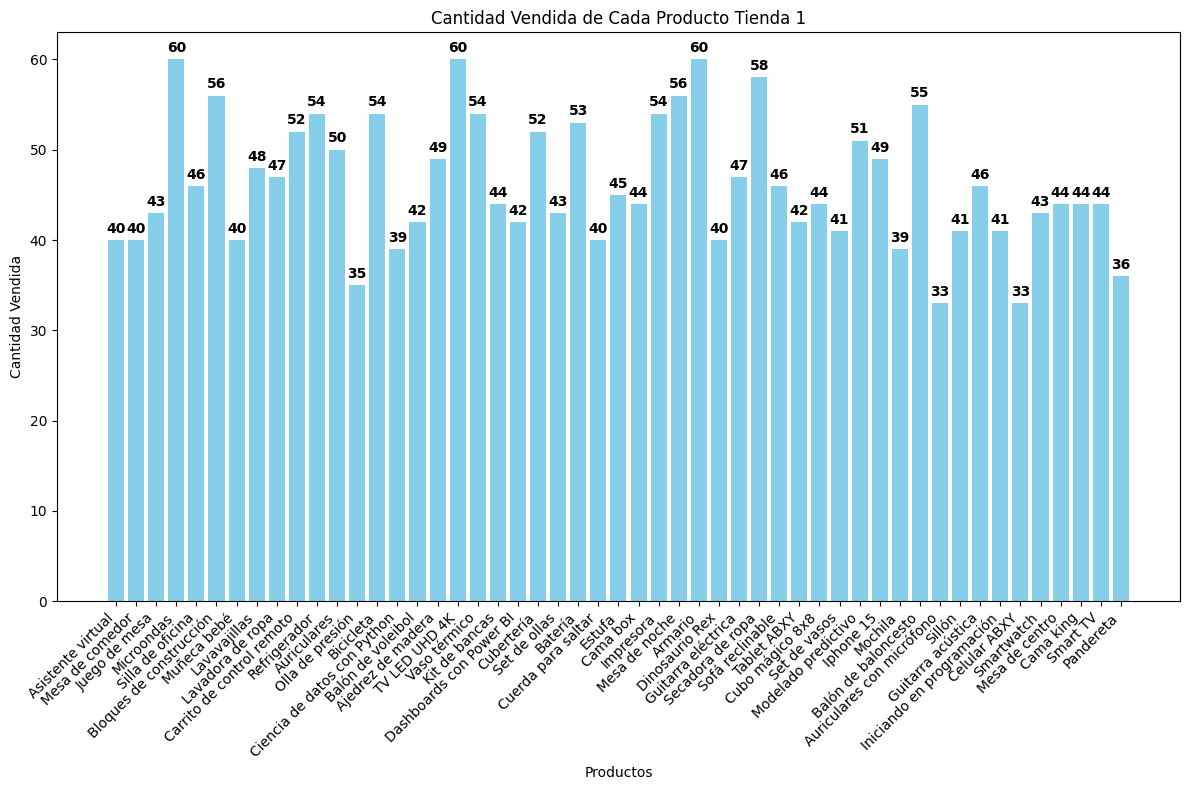

El producto más vendido en Tienda 2 es 'Iniciando en programación' con 65 unidades vendidas.


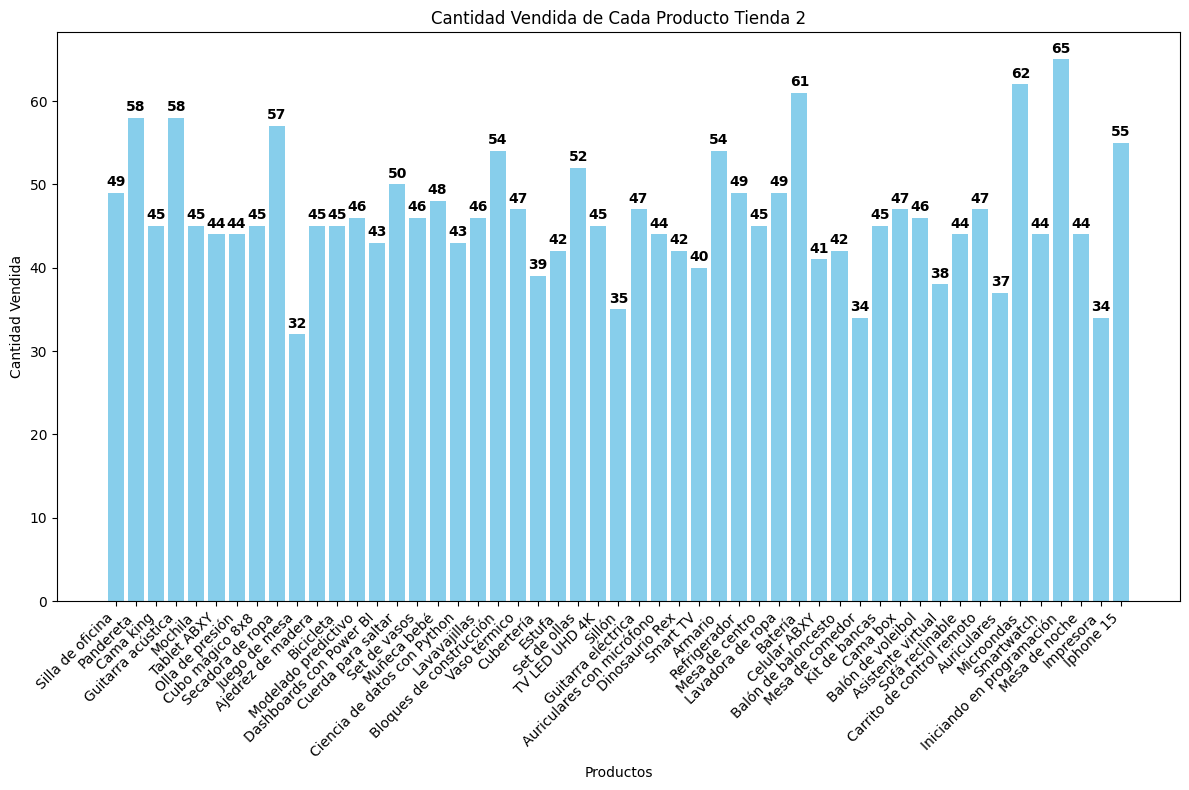

El producto más vendido en Tienda 3 es 'Kit de bancas' con 57 unidades vendidas.


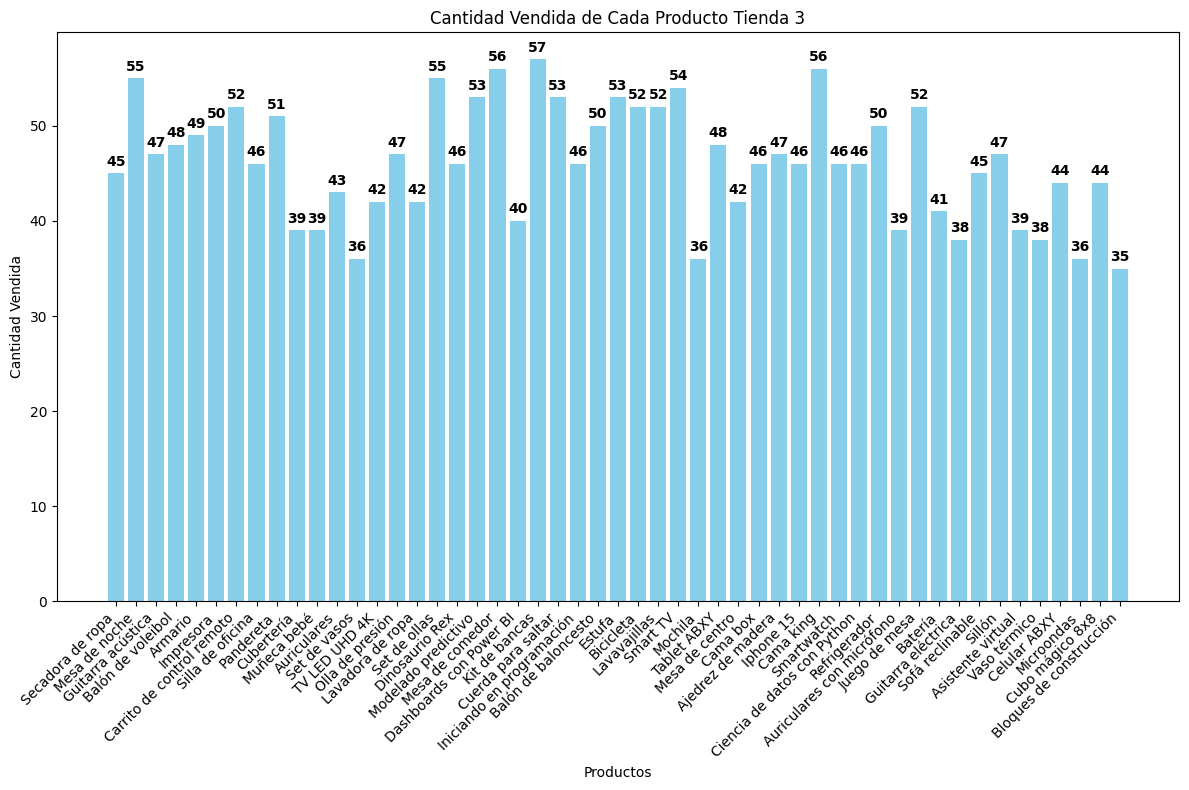

El producto más vendido en Tienda 4 es 'Cama box' con 62 unidades vendidas.


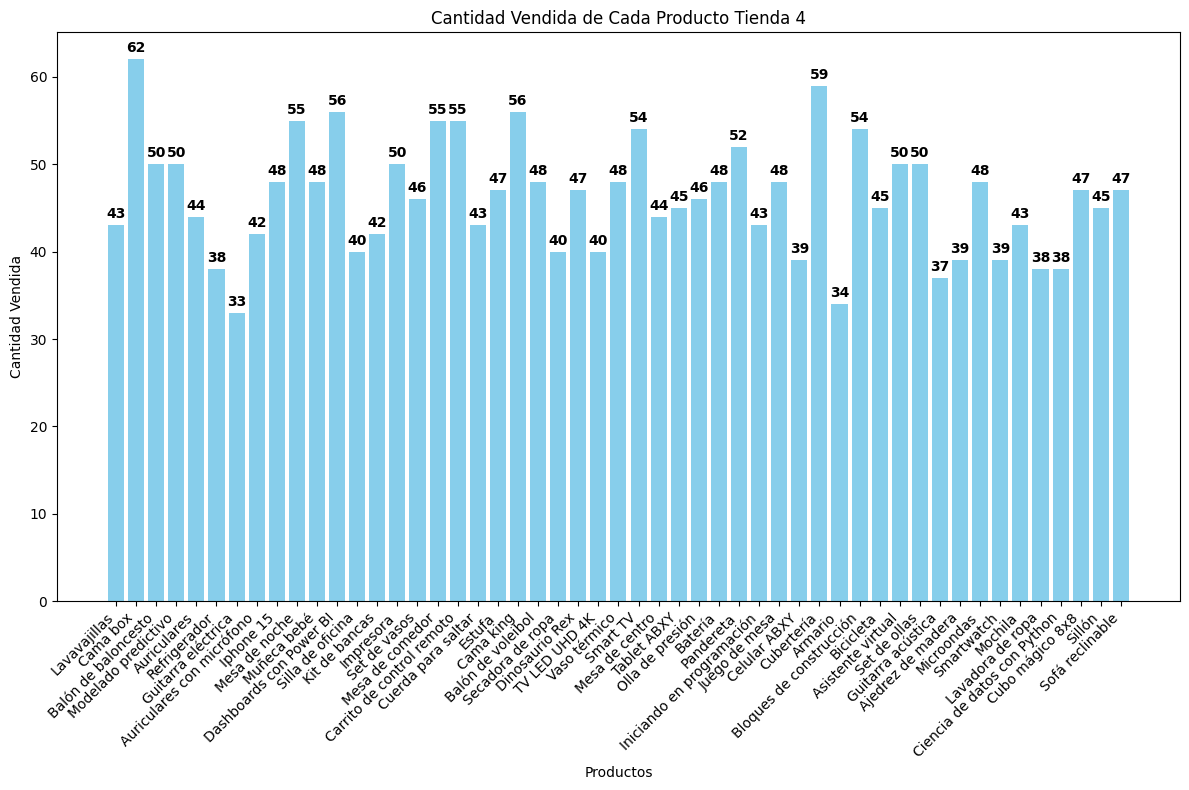

El producto más vendido en Global es 'Mesa de noche' con 210 unidades vendidas.


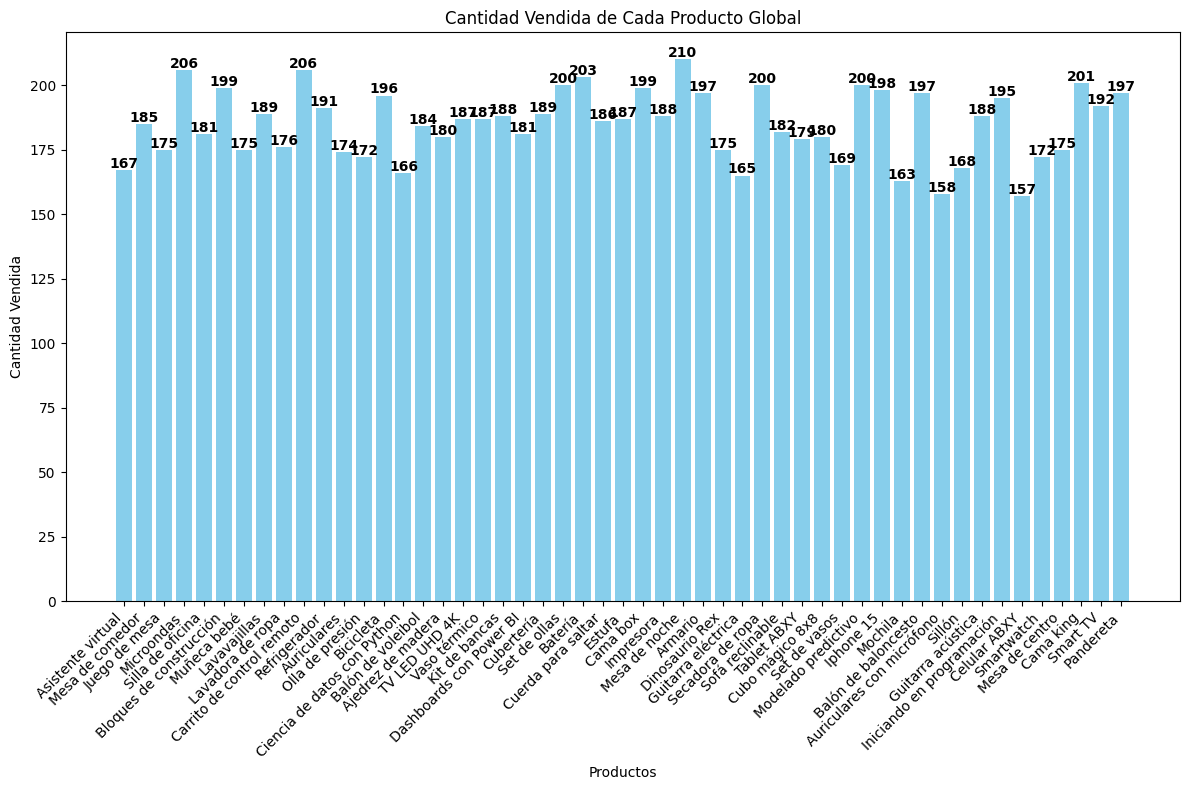

In [22]:
producto_mas_vendido(tienda, "Tienda 1")
producto_mas_vendido(tienda2, "Tienda 2")
producto_mas_vendido(tienda3, "Tienda 3")
producto_mas_vendido(tienda4, "Tienda 4")
producto_mas_vendido(df_total,"Global")

Con esta funcion podemos ver los productos mas vendidos en cada tienda y en el global.


*   Tienda 1 : Microondas, con 60 unidades.

*   Tienda 2 : Iniciando en programación, con 65 unidades.



*   Tienda 3 : Kit de bancas, con 57 unidades.


*   Tienda 4 : Cama box, con 62 unidades.

*   Global de tiendas : Mesa de noche, con 210 unidades.





## 4.2 Productos menos vendidos.

In [44]:


def productos_menos_vendidos(shop: pd.DataFrame, tienda_number: str, n: int = 5):
  """
  Calcula y muestra los n productos menos vendidos en una tienda determinada.

  Args:
    shop: Un DataFrame de pandas que contiene los datos de la tienda.
          Debe tener una columna llamada 'Producto' que contenga los nombres
          de los productos vendidos.
    tienda_number: Una cadena de texto que representa el número o nombre de
                   la tienda (por ejemplo, "Tienda 1", "Global"). Se utiliza
                   para los títulos de impresión.
    n: El número de productos menos vendidos a retornar.
  """
  # Contar la frecuencia de cada producto
  dicTienda = {}
  for i in shop['Producto'].unique():
    dicTienda[i] = len(shop[shop['Producto'] == i])

  # Ordenar los productos por cantidad vendida de forma ascendente, utiliza una funcion lambda que toma el primer
  # elemento de la tupla (key, value del dicc).
  productos_ordenados = sorted(dicTienda.items(), key=lambda item: item[1])

  # Tomar los n ( a eleccion ) productos menos vendidos
  productos_menos_vendidos_lista = productos_ordenados[:n]
  print(productos_menos_vendidos_lista)

  print(f"Los {n} productos menos vendidos en {tienda_number}:")
  print("////////////////////")
  for producto, cantidad in productos_menos_vendidos_lista:
    print(f"- '{producto}': {cantidad} unidades vendidas.")

  #plt.figure(figsize=(12, 8))
  #plt.barh([producto for producto, _ in productos_menos_vendidos_lista], [cantidad for _, cantidad in productos_menos_vendidos_lista], color='skyblue')
  #plt.xlabel("Cantidad Vendida")
  #plt.ylabel("Productos")
  #plt

  return productos_menos_vendidos_lista

menos_vendidos_tienda1 = productos_menos_vendidos(tienda, "Tienda 1", n=5)
menos_vendidos_tienda2 = productos_menos_vendidos(tienda2, "Tienda 2", n=5)
menos_vendidos_tienda4 = productos_menos_vendidos(tienda3, "Tienda 3", n=5)
menos_vendidos_tienda5 = productos_menos_vendidos(tienda4, "Tienda 4", n=5)
menos_vendidos_tienda6 = productos_menos_vendidos(df_total, "Global", n=5)


[('Auriculares con micrófono', 33), ('Celular ABXY', 33), ('Olla de presión', 35), ('Pandereta', 36), ('Ciencia de datos con Python', 39)]
Los 5 productos menos vendidos en Tienda 1:
////////////////////
- 'Auriculares con micrófono': 33 unidades vendidas.
- 'Celular ABXY': 33 unidades vendidas.
- 'Olla de presión': 35 unidades vendidas.
- 'Pandereta': 36 unidades vendidas.
- 'Ciencia de datos con Python': 39 unidades vendidas.
[('Juego de mesa', 32), ('Mesa de comedor', 34), ('Impresora', 34), ('Sillón', 35), ('Auriculares', 37)]
Los 5 productos menos vendidos en Tienda 2:
////////////////////
- 'Juego de mesa': 32 unidades vendidas.
- 'Mesa de comedor': 34 unidades vendidas.
- 'Impresora': 34 unidades vendidas.
- 'Sillón': 35 unidades vendidas.
- 'Auriculares': 37 unidades vendidas.
[('Bloques de construcción', 35), ('Set de vasos', 36), ('Mochila', 36), ('Microondas', 36), ('Guitarra eléctrica', 38)]
Los 5 productos menos vendidos en Tienda 3:
////////////////////
- 'Bloques de cons

La funcion "productos_menos_vendidos()" nos muestra, para cada tienda, los productos menos vendidos. En este caso, toma como argumentos n cantidad de unidades, pudiendo ser menos la cantidad seleccionada. Por supuesto podemos graficar estos datos.

In [32]:
# Esta otra funcion permite graficar los productos menos vendidos. Toma como argumentos las variables instanciadas arriba. Esta funcion
# podria haberse evitado, y graficar directamente arriba, pero por motivos practicos se separa.

def grafico_menos_vendido(objeto: list, number:str):
   """
  Grafica los productos menos vendidos.

  Args:
    objeto: una lista con tuplas de productos y cantidades

  """

   plt.figure(figsize=(12, 8))
   plt.barh([producto for producto, _ in objeto], [cantidad for _, cantidad in objeto], color='green')

   plt.title(f"Productos Menos Vendidos Tienda {number}")
   plt.xlabel("Cantidad Vendida")
   plt.ylabel("Productos")
   plt.show()

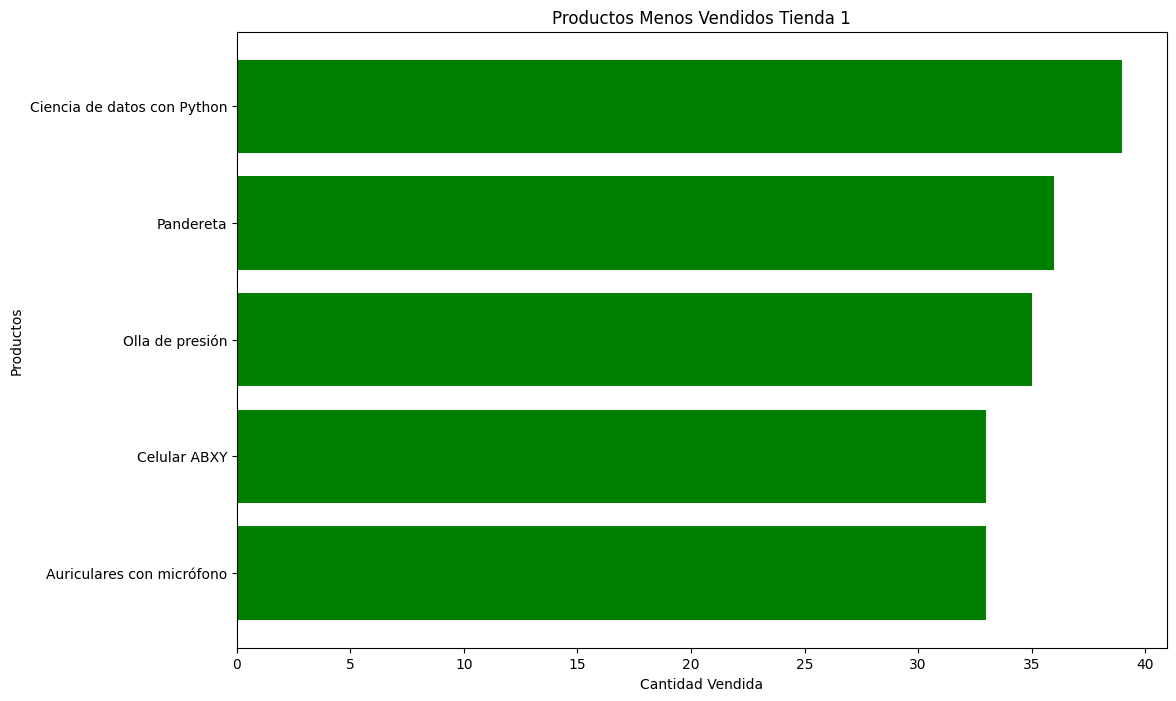

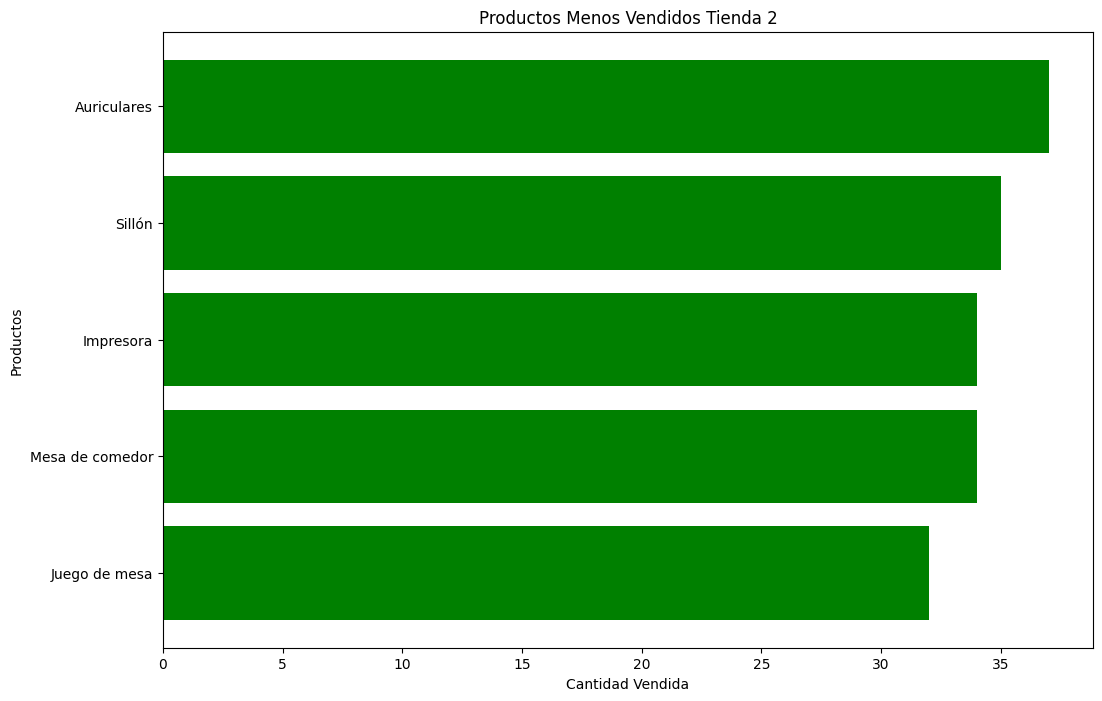

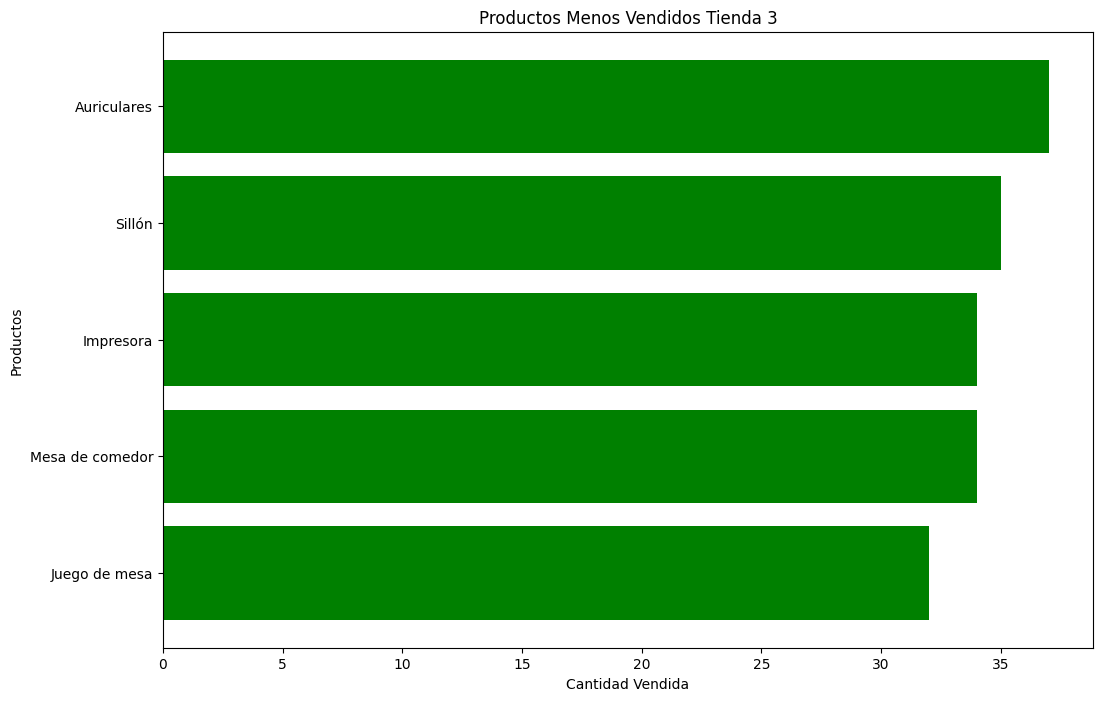

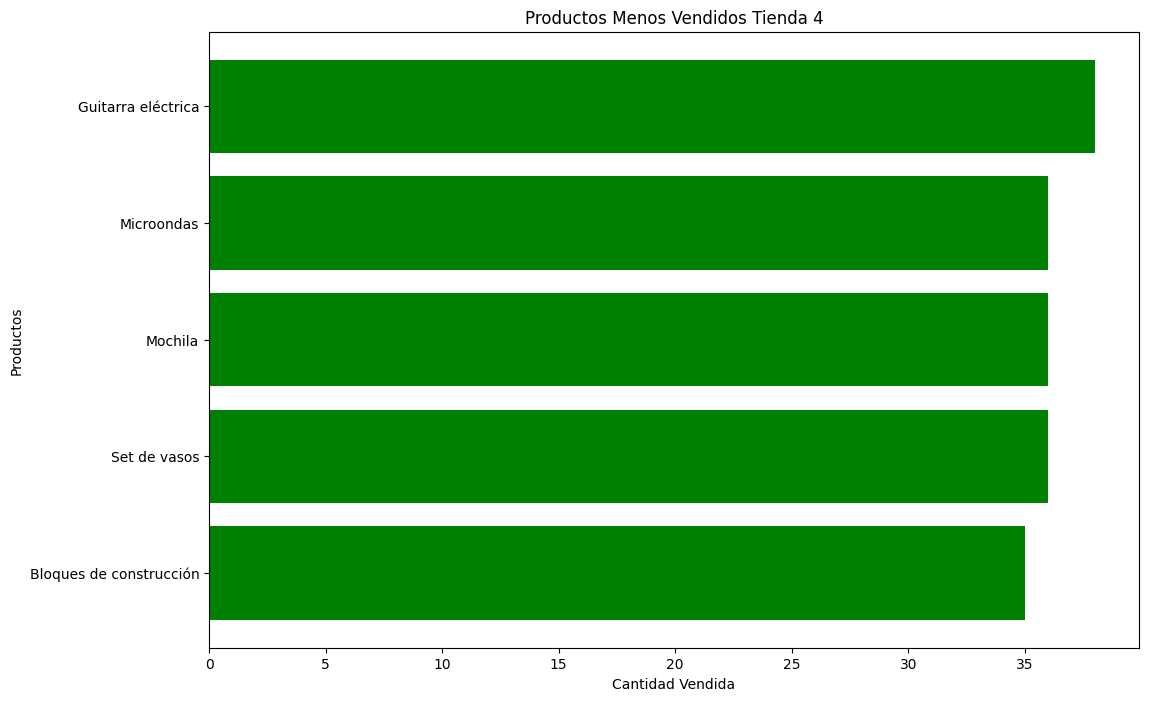

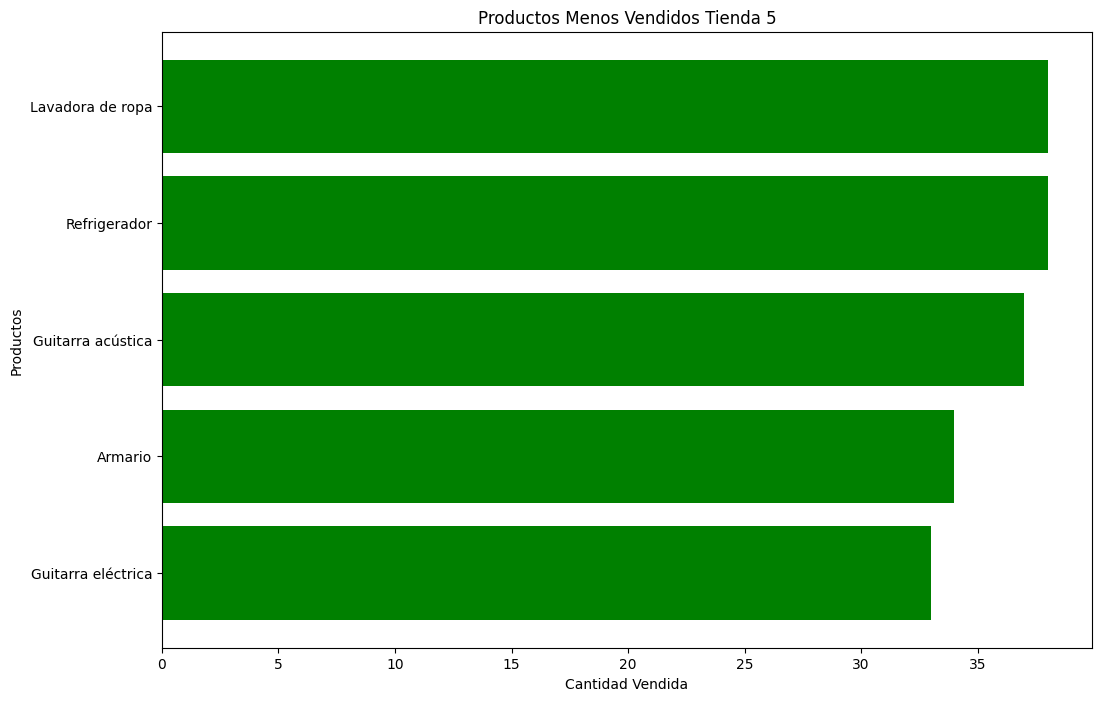

In [47]:
lista_menos_vendidos = [menos_vendidos_tienda1, menos_vendidos_tienda2, menos_vendidos_tienda3, menos_vendidos_tienda4, menos_vendidos_tienda5]
count = 1
for i in lista_menos_vendidos:

      grafico_menos_vendido(i, count)
      count += 1


Por ultimo aca podemos ver graficados los resultados.

0


# 5. Envío promedio por tienda

In [54]:


# Obtener la primera fila del DataFrame tienda para obtener las coordenadas de la tienda
tienda_coords = tienda[['lat', 'lon']].iloc[0]

mapa = folium.Map(location=[tienda_coords['lat'], tienda_coords['lon']], zoom_start=12)

# Iterar sobre cada envío en la tienda 1 y agregarlo como un marcador en el mapa
for index, row in tienda.iterrows():
  folium.Marker(
      location=[row['lat'], row['lon']],
      popup=f"Producto: {row['Producto']}<br>Precio: {row['Precio']}<br>Calificación: {row['Calificación']}",
      icon=folium.Icon(color='blue')
  ).add_to(mapa)

# Mostrar el mapa
mapa